<a href="https://colab.research.google.com/github/flubber-lab/Simple-Restaurant-Data-Analysis/blob/main/Restaurant_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Restaurant data.csv")

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
def hr(value):
  value = str(value).split('/')
  value = value [0]
  return float(value)
df['rate'] = df['rate'].apply(hr)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<ipython-input-32-e803bceb5b02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'],palette='pastel')


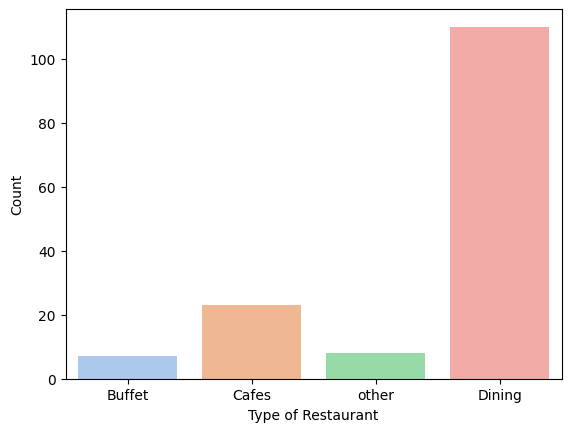

In [32]:
sns.countplot(x=df['listed_in(type)'],palette='pastel')
plt.ylabel("Count")
plt.xlabel("Type of Restaurant")
plt.show()


From the chart above we can conclude that the majority of the restaurants fall under Dining Category

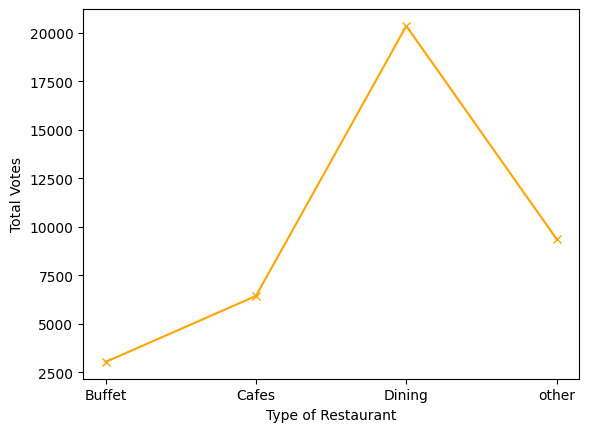

In [31]:
gd = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({"votes": gd})
plt.plot(result, c='orange',marker = 'x')
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.show()

From the chart above we can conclude that people prefer restarunts with dining option

In [30]:
max_votes = df['votes'].max()
res = df.loc[df['votes']==max_votes,"name"]
print("Restaurant with maximum votes:")
print(res)

Restaurant with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Empire Restaurant has the maximum number of votes

<ipython-input-36-27374b9efbae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette='pastel')


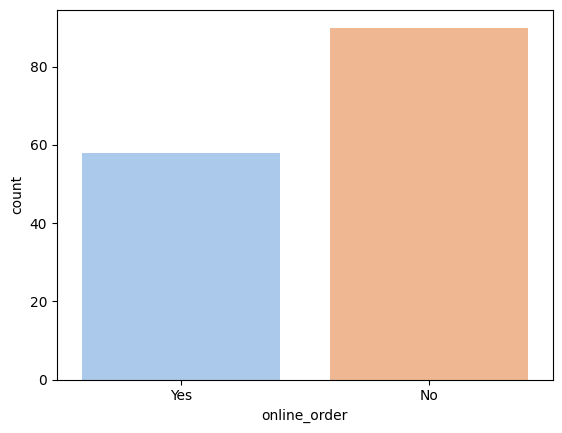

In [36]:
sns.countplot(x=df['online_order'],palette='pastel')
plt.show()

This shows that the majority of the restaurants don't accept online orders

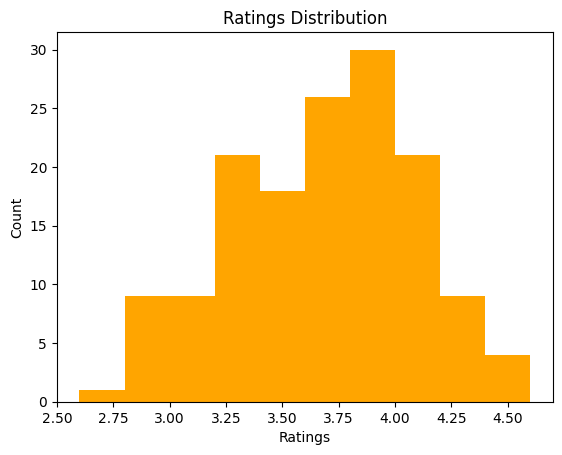

In [39]:
plt.hist(df['rate'],bins=10,color='orange')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()


The majority of the restaurants received ratings over 3.5 and 4

<ipython-input-41-99f65303d05e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cft,palette='pastel')


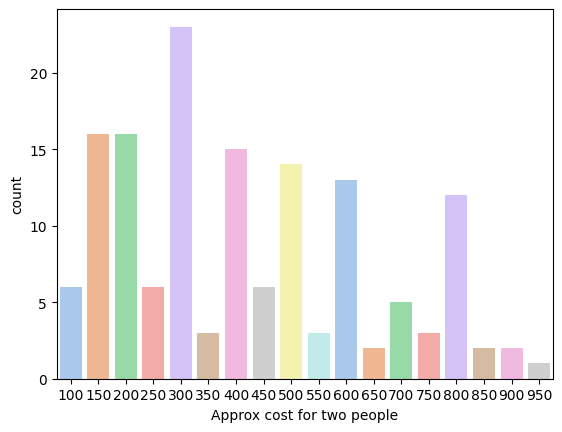

In [41]:
cft = df['approx_cost(for two people)']
sns.countplot(x=cft,palette='pastel')
plt.xlabel("Approx cost for two people")
plt.show()

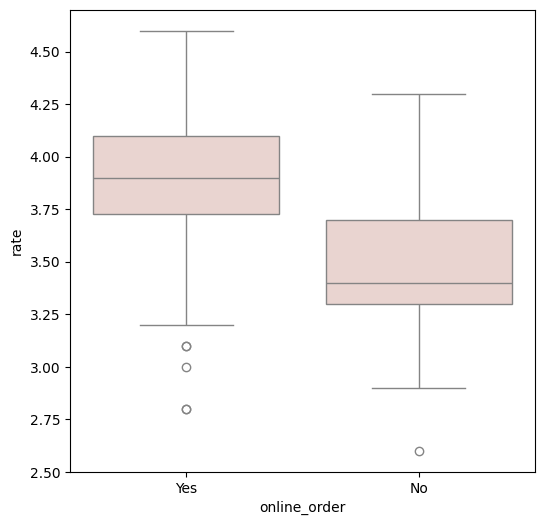

In [45]:
from re import X
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df, hue = X, legend=False)
plt.show()


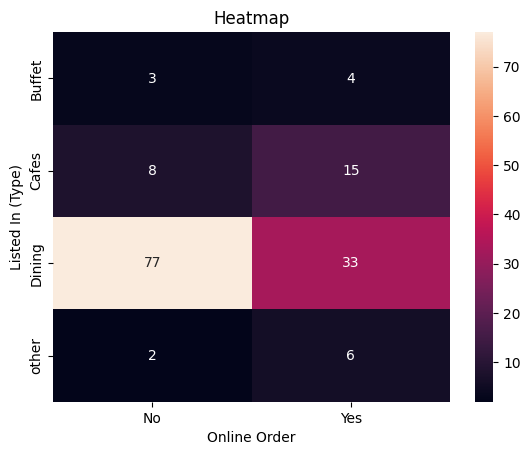

In [52]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="rocket", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


This chart shows that the cafes receive more online order than the dining restaurants.